# Multiple Sequence Alignment of 16S Ribosomal RNA Genes in Bacteria

## Introduction to Multiple Sequence Alignment (MSA)

Multiple sequence alignment (MSA) is a method used to align three or more biological sequences (protein, DNA, or RNA) to identify regions of similarity that may indicate functional, structural, or evolutionary relationships. MSA is crucial for:
- Identifying conserved sequences across different species
- Inferring phylogenetic relationships
- Predicting secondary and tertiary structures of proteins and RNAs
- Understanding evolutionary changes and functional divergence

In this project, we focus on the 16S ribosomal RNA (rRNA) genes from various bacteria. The 16S rRNA gene is a highly conserved component of the small subunit of prokaryotic ribosomes and is commonly used in phylogenetic studies. By leveraging MSA, we aim to explore the conserved regions and variations among these bacterial sequences. The steps will include sequence retrieval, performing MSA using different tools, and analyzing the results comprehensively.


**Sequence Retrieval**                                                                                                                                       
We'll retrieve the 16S rRNA gene sequences for various bacteria using NCBI Entrez.

In [1]:
from Bio import Entrez, SeqIO

# Setting up email address to NCBI
Entrez.email = "karkidholipankaj@gmail.com"

# Searching for 16S rRNA sequences from bacteria
search_term = "16S ribosomal RNA[Gene] AND Bacteria[Organism]"
handle = Entrez.esearch(db="nucleotide", term=search_term, retmax=20)
record = Entrez.read(handle)
handle.close()

# Printing the number of sequences found
print("Number of sequences found:", record["Count"])

# Fetching the sequences
id_list = record["IdList"]
print("Number of sequence IDs retrieved:", len(id_list))

handle = Entrez.efetch(db="nucleotide", id=id_list, rettype="fasta", retmode="text")
sequences = list(SeqIO.parse(handle, "fasta"))
handle.close()

# Filtering sequences to be within the expected length for 16S rRNA
filtered_sequences = []
for seq in sequences:
    if 1200 <= len(seq.seq) <= 1600:
        filtered_sequences.append(seq)

# Checking the number of sequences retrieved and filtered
print("Number of sequences fetched:", len(sequences))
print("Number of sequences after filtering:", len(filtered_sequences))

# Saving filtered sequences to a file
output_handle = open("bacterial_16s_rrna_filtered.fasta", "w")
SeqIO.write(filtered_sequences, output_handle, "fasta")
output_handle.close()

# Calculating the length of each filtered sequence
for record in filtered_sequences:
    print("Length of " + record.id + ": " + str(len(record.seq)))

Number of sequences found: 141
Number of sequence IDs retrieved: 20
Number of sequences fetched: 16
Number of sequences after filtering: 10
Length of FN185731.1: 1513
Length of FJ184385.1: 1384
Length of DQ103668.1: 1488
Length of DQ103667.1: 1466
Length of DQ103666.1: 1477
Length of DQ103665.1: 1464
Length of DQ103664.1: 1463
Length of DQ103663.1: 1481
Length of DQ103662.1: 1458
Length of DQ103661.1: 1415


**Performing Multiple Sequence Alignment (MSA)**                                                                                       
We will now perform multiple sequence alignment (MSA) using ClustalW. This process aligns the sequences to identify regions of similarity, which may indicate functional, structural, or evolutionary relationships between the sequences.

In [5]:
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO

# Path to ClustalW executable
clustalw_exe = r"C:\\Program Files (x86)\\ClustalW2\\clustalw2.exe"

# Defining input and output files
in_file = "bacterial_16s_rrna_filtered.fasta"
out_file = "bacterial_16s_rrna_filtered.aln"

# Setting up the ClustalW command line
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=in_file)

# Running ClustalW
stdout, stderr = clustalw_cline()

# Loading the alignment file
alignment = AlignIO.read("bacterial_16s_rrna_filtered.aln", "clustal")

# Printing the alignment after truncating
for record in alignment:
    truncated_seq = str(record.seq)[:90]
    if len(record.seq) > 90:
        truncated_seq += "....."
    print(f">{record.id} {truncated_seq}")
    

>DQ103664.1 -------------------ATTGAACGCTGGCGGCATGCCTAACACATGCAAGTCGAACGGT--AACGCGGGAGCTTGCTCCT-------.....
>DQ103663.1 -------------------ATTGAACGCTGGCGGCATGCTTAACACATGCAAGTCGTGGGGC--AGCAGGTCAGACAATCCCTTCGGGGT.....
>DQ103665.1 -------------------ATTGAACGCTAGCGGCATGCCTGACACATGCAAGTCGAACGGC--AGCGCGGGAAAGCTTGCTTTCC----.....
>DQ103662.1 -------------------AATAAACGTTGGCGGCGTGCCTAACACATGCAAGTCG--------AGCGAGAAAGCTTCTTCGGGAG----.....
>DQ103667.1 -------------------AATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGAG--AAAGCCC----CCTTCGGGGGG----.....
>DQ103666.1 -------------------AATGAACGCTGGCGGCGTGCCTAACACATGCAAGTCGAGCGAG--AAAGTCA----CCTTCGGGTGG----.....
>DQ103668.1 -------------------AATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGAG--AAAGCCGAAAGCTTGCTTTTGG----.....
>FJ184385.1 -----------------------------------------------TGCAAGTCG--------AACGGAA----TCCTTAG--------.....
>FN185731.1 AGTTTTGATTATGGCTCAGGACGAACGCTGGCGGCATGCCTAATACATGCAAGTCGAACGCGTCTTCGTTAACTGAAGTGCTTGCACGGA.....
>DQ103661.1 ----------------

In [8]:
import pandas as pd

# Convert alignment to DataFrame
def alignment_to_dataframe(alignment):
    align_list = []
    for record in alignment:
        align_list.append(list(str(record.seq)))
    df = pd.DataFrame(align_list, index=[record.id for record in alignment])
    return df

df_alignment = alignment_to_dataframe(alignment)

# Set pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(df_alignment)


           0    1    2    3    4    5    6    7    8    9    10   11   12    \
DQ103664.1    -    -    -    -    -    -    -    -    -    -    -    -    -   
DQ103663.1    -    -    -    -    -    -    -    -    -    -    -    -    -   
DQ103665.1    -    -    -    -    -    -    -    -    -    -    -    -    -   
DQ103662.1    -    -    -    -    -    -    -    -    -    -    -    -    -   
DQ103667.1    -    -    -    -    -    -    -    -    -    -    -    -    -   
DQ103666.1    -    -    -    -    -    -    -    -    -    -    -    -    -   
DQ103668.1    -    -    -    -    -    -    -    -    -    -    -    -    -   
FJ184385.1    -    -    -    -    -    -    -    -    -    -    -    -    -   
FN185731.1    A    G    T    T    T    T    G    A    T    T    A    T    G   
DQ103661.1    -    -    -    -    -    -    -    -    -    -    -    -    -   

           13   14   15   16   17   18   19   20   21   22   23   24   25    \
DQ103664.1    -    -    -    -    -    -    A    T 

In [10]:
from Bio.Align import AlignInfo

# Generating summary of the alignment
summary_align = AlignInfo.SummaryInfo(alignment)

# Getting the consensus sequence
consensus = summary_align.dumb_consensus()

# Printing the consensus sequence with positions
print("Consensus sequence with positions:")

# Define the width for formatting
width = 5

# Print the positions
position_line = ''.join([f"{i+1:>{width}}" for i in range(len(consensus))])
print(position_line)

# Print the consensus sequence
consensus_line = ''.join([f"{nucleotide:>{width}}" for nucleotide in consensus])
print(consensus_line)

Consensus sequence with positions:
    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96   97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193

The consensus sequence generated from aligning 10 sequences of 16S rRNA shows both conserved and variable regions. Conserved regions, represented by consistent nucleotide patterns, are likely functionally significant for the 16S rRNA's role in ribosomal RNA structure and function. These regions are crucial for maintaining the integrity and function of the ribosome. In contrast, segments with frequent ambiguous bases (X) indicate variability, reflecting genetic diversity among the sequences or regions with less evolutionary pressure to conserve specific nucleotides. This variability can provide insights into the evolutionary relationships and adaptations among the organisms from which these sequences were derived.

In [2]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

# Convert alignment to a list of sequences
def alignment_to_list(alignment):
    align_list = []
    for record in alignment:
        align_list.append(str(record.seq))
    return align_list

# Assuming `alignment` is already defined and contains the sequences
sequences = alignment_to_list(alignment)

# Create a DataFrame from the sequences
sequences_series = pd.Series(sequences)

# Convert the sequences to a matrix suitable for Logomaker
logo_df = logomaker.alignment_to_matrix(sequences_series, to_type='counts')

# Create and display the sequence logo with color coding
fig, ax = plt.subplots(figsize=(200, 5), dpi=300)  # Adjust the figsize and increase DPI for better resolution
logo = logomaker.Logo(logo_df, ax=ax)

# Define colors for nucleotides
color_scheme = {
    'A': 'red',
    'C': 'blue',
    'G': 'green',
    'T': 'yellow',
    '-': 'gray',
    'X': 'gray'
}

# Apply the color scheme
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
logo.style_xticks(rotation=90, fmt='%d', anchor=0)
logo.style_xticks(fmt='%d', rotation=90)
logo.ax.set_xticks(range(0, len(logo_df.columns), 10))
logo.ax.set_xticklabels(range(0, len(logo_df.columns), 10))
logo.style_glyphs(color_scheme=color_scheme)
logo.ax.set_xlabel('Position')
logo.ax.set_ylabel('Frequency')

# Increase the width between columns
for rect in ax.patches:
    rect.set_width(rect.get_width() * 1.5)  # Increase width by a factor of 1.5
    rect.set_x(rect.get_x() * 1.5)  # Adjust position to maintain spacing

# Save the figure with high resolution
plt.savefig('sequence_logo.png', dpi=300)  # Save the figure with high DPI

# Display the logo
plt.show()

NameError: name 'alignment' is not defined

C:\Users\acer\AppData\Local\Temp\ipykernel_13024\1169032202.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(df_alignment.applymap(lambda x: {'A': 1, 'T': 2, 'C': 3, 'G': 4, '-': 0, 'X': 0}.get(x, 0)),


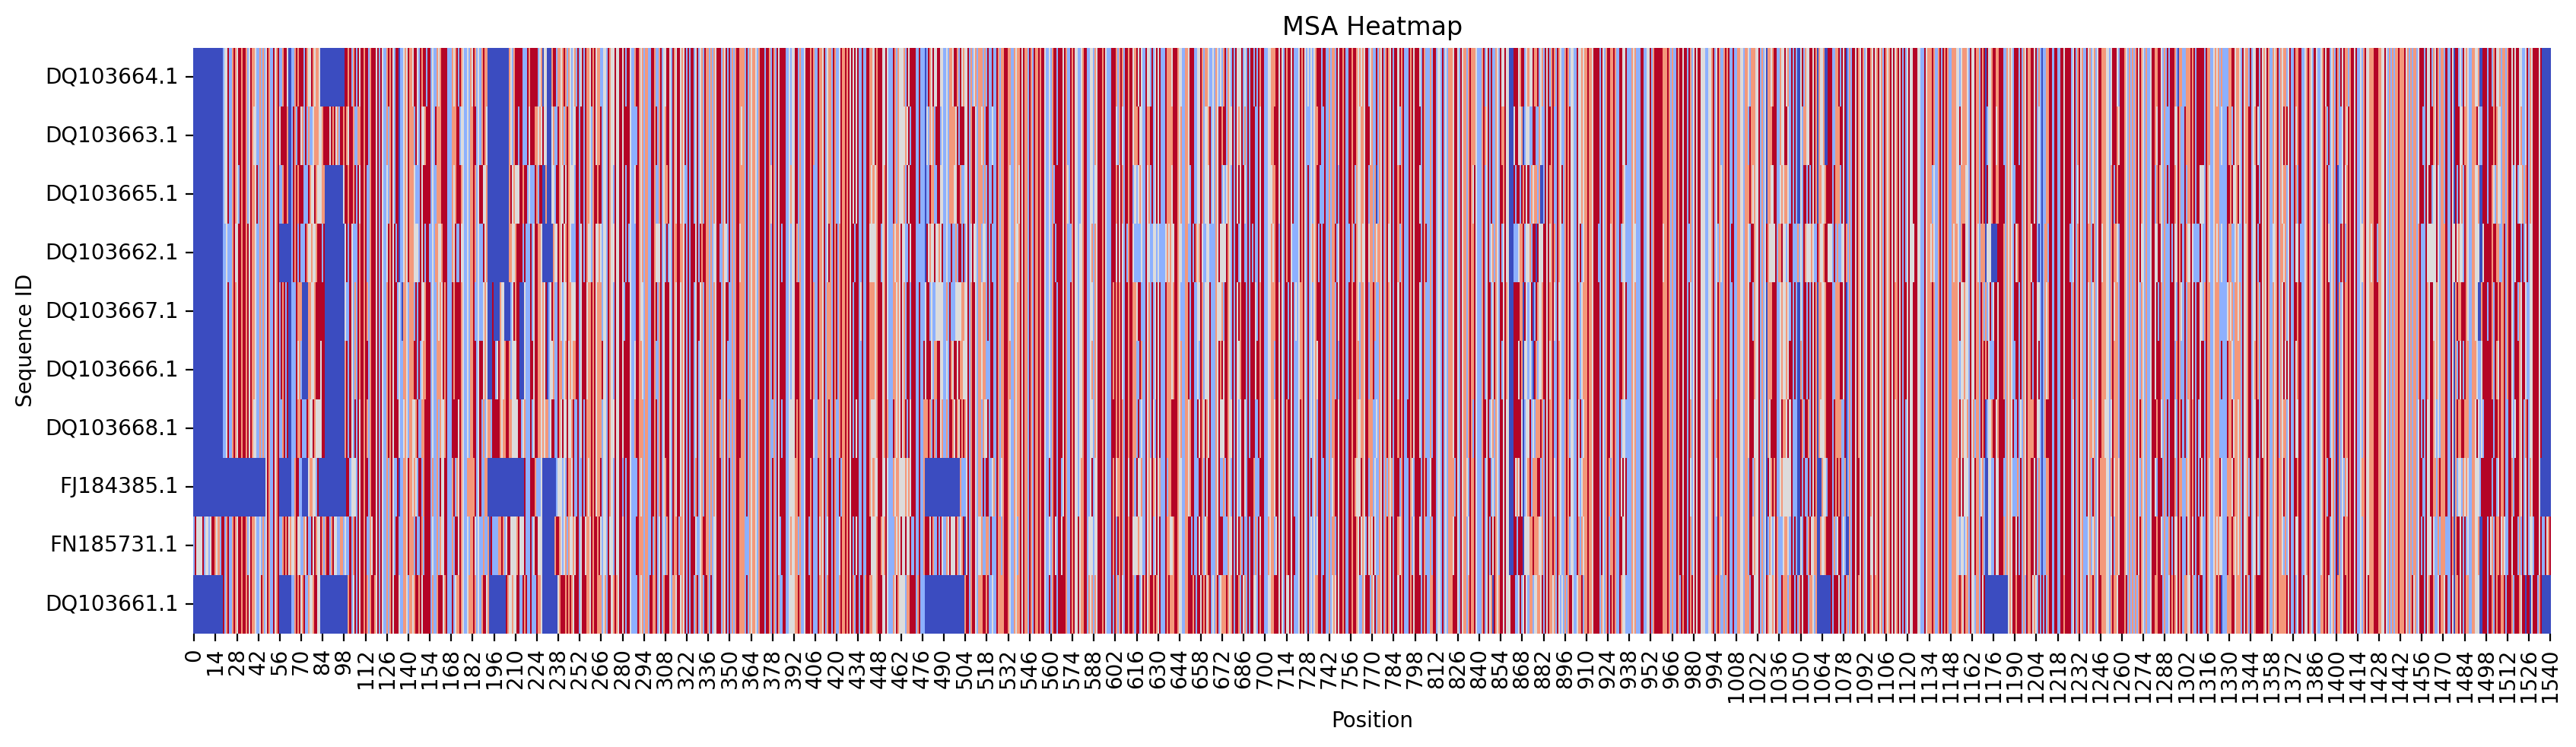

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(20, 5), dpi=200)
sns.heatmap(df_alignment.applymap(lambda x: {'A': 1, 'T': 2, 'C': 3, 'G': 4, '-': 0, 'X': 0}.get(x, 0)),
            cmap="coolwarm", cbar=False)
plt.xlabel('Position')
plt.ylabel('Sequence ID')
plt.title('MSA Heatmap')
plt.show()


**Interpretation of MSA Heatmap**                                                                                                                                         
The heatmap above represents the Multiple Sequence Alignment (MSA) of 10 sequences retrieved using the Entrez module and aligned using Biopython. Each row corresponds to a sequence identified by its unique accession number, and each column corresponds to a specific position in the alignment.

**Key Observations**
- **Color Coding**:
  - The heatmap uses a color gradient from blue to red, where:
    - Dark blue represents gaps ('-') or unknown positions ('X').
    - Light blue represents 'A' (Adenine).
    - White represents 'T' (Thymine).
    - Light red represents 'C' (Cytosine).
    - Dark red represents 'G' (Guanine).
  
- **Conserved Regions**:
  - Highly conserved regions can be identified by consistent colors across all sequences at specific positions. 
  - For example, positions around 440-460 and 980-1000 show a predominance of certain colors, indicating sequence conservation.
  
- **Variable Regions**:
  - Regions with a mix of colors indicate high variability. 
  - Notable variable positions are around 80-100, 500-520, and 1400-1420, where different nucleotides are present across the sequences.
  
- **Sequence Similarity**:
  - Sequences with similar patterns of colors across multiple positions suggest higher similarity.
  - For instance, sequences DQ103664.1, DQ103663.1, and DQ103665.1 exhibit similar patterns, hinting at a closer evolutionary relationship.

**Biological Insights**

- **Functional Sites**:
  - Highly conserved regions (e.g., positions 440-460) might indicate important functional or structural sites, such as binding sites or active sites in proteins.

- **Evolutionary Relationships**:
  - Variable regions (e.g., positions 80-100, 500-520) might suggest evolutionary divergence or regions under less functional constraint.

- **Further Analysis**:
  - The observed patterns guide further functional and structural analyses to understand the role of these conserved and variable regions in the biological context of these sequences.

This heatmap provides a visual summary of sequence conservation and variability, facilitating the identification of regions of interest for more detailed investigation.